In [1]:
pip install pandas numpy matplotlib pydicom cv2

SyntaxError: invalid syntax (<ipython-input-1-8f1f01dc8128>, line 1)

In [2]:
import pandas as pd

In [3]:
import pydicom as dcm

ImportError: No module named 'pydicom'

In [4]:
pip install pydicom

SyntaxError: invalid syntax (<ipython-input-4-df2abd6443e0>, line 1)

In [1]:
import os,sys

In [2]:
os.chdir("C:\\csi758dev\\csi758project")
sys.path.append("C:\\csi758dev\\csi758project")

In [3]:
sys.path.append("C:\\users\\bruce\\anaconda3\\lib\\site-packages")

In [4]:
import cv2

In [5]:
import pydicom

ImportError: No module named 'pydicom'

In [6]:
import pydicom

ImportError: No module named 'pydicom'

In [7]:
import dicom

In [8]:
import dicom

In [9]:
img = dicom.read_file("sample_images\\00cba091fa4ad62cc3200a657aeb957e\\0a291d1b12b86213d813e3796f14b329.dcm")

In [10]:
import pandas as pd

In [12]:
data_dir = 'sample_images'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('stage1_labels.csv',index_col=0)

labels_df.head()

,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


In [20]:
for patient in patients[:10]:
    label = labels_df.get_value(patient,'cancer')
    path = os.path.join(data_dir,patient)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    print(len(slices), label, slices[0].pixel_array.shape)
    #print(slices[0])

134 0 (512, 512)
128 0 (512, 512)
133 0 (512, 512)
110 0 (512, 512)
203 1 (512, 512)


KeyError: '0b20184e0cd497028bdd155d9fb42dc9'

In [21]:
len(patients)

20

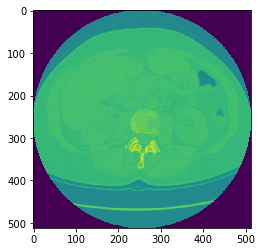

In [22]:
import matplotlib.pyplot as plt

for patient in patients[:1]:
    label = labels_df.get_value(patient,'cancer')
    path = os.path.join(data_dir,patient)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    plt.imshow(slices[0].pixel_array)
    plt.show()

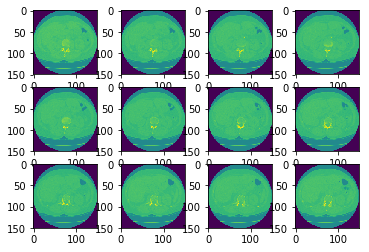

In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

IMG_PX_SIZE = 150

for patient in patients[:1]:
    label = labels_df.get_value(patient,'cancer')
    path = os.path.join(data_dir,patient)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_image = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_image)
    plt.show()